# Book value growth and stock price growth

Charlie Munger once said that in the long run, stock price will track the book value. Let's see if this is true.

In [120]:
from fmp_data import Dataset, AFTER_PRICE

symbols = {'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NFLX', 'DIS', 'UNH', 'NKE', 'LRN', 'BRK-A', 'NVDA', 'COKE'}

df = pd.DataFrame()
for sym in symbols:
    cur = Dataset(sym, ['book_value_per_share', AFTER_PRICE], {'book_value_per_share': 'book', AFTER_PRICE: 'price'})
    cur.data['symbol'] = sym
    df =pd.concat([df, cur.data])
df['pb'] = np.where(df['book'] > 0,  df['price']/ df['book'], np.nan)
df['date'] = pd.to_datetime(df['date'])

In [121]:
df[df.symbol == 'AAPL'].sort_values('date').tail(10)

,date,book,price,symbol,pb
110,2022-06-25,3.595075,139.76,AAPL,38.875406
111,2022-09-24,3.160998,148.95,AAPL,47.121199
112,2022-12-31,3.569369,123.77,AAPL,34.675592
113,2023-04-01,3.937252,164.69,AAPL,41.828669
114,2023-07-01,3.839692,191.01,AAPL,49.746180
115,2023-09-30,3.983862,172.68,AAPL,43.344870
116,2023-12-30,4.777636,184.73,AAPL,38.665567
117,2024-03-30,4.815961,169.42,AAPL,35.178857
118,2024-06-29,4.354308,216.26,AAPL,49.665755
119,2024-09-28,3.753628,232.74,AAPL,62.004020


          date        book    price symbol        pb  book_chg  price_chg
0   1995-01-01    3.684725    16.24   COKE  4.407384       NaN        NaN
1   1995-04-02    3.528000    18.43   COKE  5.223923 -0.042534   0.134852
2   1995-07-02    4.221111    19.69   COKE  4.664649  0.196460   0.068367
3   1995-10-01    4.532609    22.07   COKE  4.869161  0.073795   0.120874
4   1995-12-31    4.209568    22.32   COKE  5.302206 -0.071270   0.011328
..         ...         ...      ...    ...       ...       ...        ...
115 2023-09-29  162.612332   621.93   COKE  3.824618  0.104819   0.001256
116 2023-12-31  153.146789   914.54   COKE  5.971656 -0.058209   0.470487
117 2024-03-29  170.811393   833.68   COKE  4.880705  0.115344  -0.088416
118 2024-06-28  128.418825  1082.36   COKE  8.428359 -0.248183   0.298292
119 2024-09-27  146.671270  1293.40   COKE  8.818360  0.142132   0.194981

[120 rows x 7 columns]


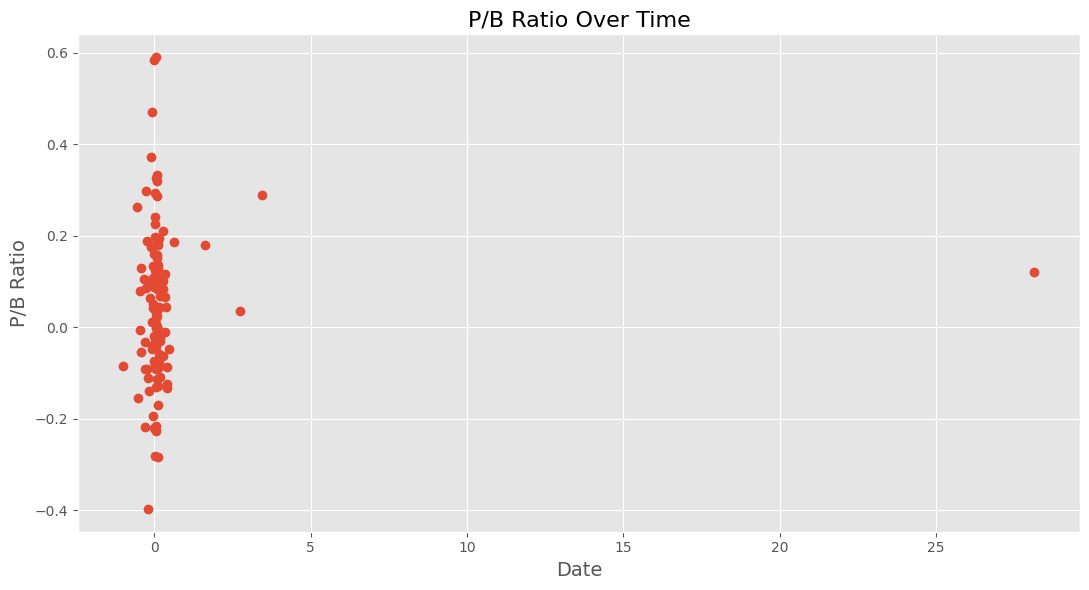

In [132]:

fig, ax = plt.subplots(figsize=(11, 6))

for symbol, group in df.groupby('symbol'):    
    # Plot the data
    if symbol in ['COKE', ]:
        t = group.sort_values('date')
        t['book_chg'] = t.book.pct_change()
        t['price_chg'] = t.price.pct_change()
        #t = t[t.pb < 10]
        #t.plot(x='date', y='pb', marker='o', label=f'{symbol} P/B', ax=ax)
        # t.plot(x='date', y='book_chg', marker='o', label=f'{symbol} Book', ax=ax)
        # ax2 = ax.twinx()
        # t.plot(x='date', y='price_chg', marker='x', label=f'{symbol} Price', color='seagreen', ax=ax2)
        # ax.legend(loc='upper left')
        # ax2.legend(loc='upper right')
        plt.plot(t.book_chg, t.price_chg, 'o', label=f'{symbol} Book vs Price')
        print(t)

# Set the title and axis labels
ax.set_title('P/B Ratio Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('P/B Ratio', fontsize=14)
ax2.set_ylabel('Price')

plt.tight_layout()

In [93]:
df[df.symbol == 'NIKE']

,date,book,price,symbol,pb


In [103]:
from fmp_data import Dataset
t = Dataset('NVDA', ['book_value_per_share', 'after_price'])
t.data

,date,book_value_per_share,after_price
0,1999-05-02,0.005461,0.035111
1,1999-08-01,0.006160,0.038814
2,1999-10-31,0.006966,0.044904
3,2000-01-30,0.006913,0.070820
4,2000-04-30,0.010683,0.175800
...,...,...,...
97,2023-07-30,1.112050,46.710000
98,2023-10-29,1.347853,41.150000
99,2024-01-28,1.742822,62.450000
100,2024-04-28,1.996019,87.740000


In [110]:
df.groupby('symbol').get_group('NVDA').sort_values('date')

,date,book,price,symbol,pb
0,1999-05-02,0.005461,0.035111,NVDA,6.429866
0,1999-05-02,0.005461,0.035111,NVDA,6.429866
1,1999-08-01,0.006160,0.038814,NVDA,6.301104
1,1999-08-01,0.006160,0.038814,NVDA,6.301104
2,1999-10-31,0.006966,0.044904,NVDA,6.446443
...,...,...,...,...,...
99,2024-01-28,1.742822,62.450000,NVDA,35.832682
100,2024-04-28,1.996019,87.740000,NVDA,43.957486
100,2024-04-28,1.996019,87.740000,NVDA,43.957486
101,2024-07-28,2.366222,111.580000,NVDA,47.155342


In [44]:
from fmp_data import FMPPriceLoader
t = FMPPriceLoader()
t.get_next_available_price('NVDA', '2022-11-26')

(15.81, '2022-11-28')

In [112]:
Dataset('NVDA', ['book_value_per_share', 'after_price']).sort_values('date').groupby('symbol').get_group('NVDA').sort_values('date')

KeyError: 'symbol'